# Procesamiento de Datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("titanic_1.csv")
df2 = pd.read_csv("titanic_2.csv")

In [3]:
df = pd.merge(df1, df2, on = "PassengerId")

In [4]:
df

,PassengerId,Name,Sex,Age,Survived,Pclass,Ticket,Fare
0,1,"Braund, Mr. Owen Harris",male,22.0,0,3,A/5 21171,7.2500
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,PC 17599,71.2833
2,3,"Heikkinen, Miss. Laina",female,26.0,1,3,STON/O2. 3101282,7.9250
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,113803,53.1000
4,5,"Allen, Mr. William Henry",male,35.0,0,3,373450,8.0500
...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",male,27.0,0,2,211536,13.0000
887,888,"Graham, Miss. Margaret Edith",female,19.0,1,1,112053,30.0000
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,0,3,W./C. 6607,23.4500
889,890,"Behr, Mr. Karl Howell",male,26.0,1,1,111369,30.0000


**Es importante saber con cuantos elementos (filas) y atributos (columnas) estámos trabajando, además de conocer sus tipos de datos y su información estadística, y si fuese necesario, cambiar el tipo de dato de las columnas.**

In [5]:
# .shape nos da el número de filas y columnas

df.shape

(891, 8)

In [6]:
# .describe() nos da un DataFrame con la información estadística de las columnas

df.describe()

,PassengerId,Age,Survived,Pclass,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.383838,2.308642,32.204208
std,257.353842,14.526497,0.486592,0.836071,49.693429
min,1.000000,0.420000,0.000000,1.000000,0.000000
25%,223.500000,20.125000,0.000000,2.000000,7.910400
50%,446.000000,28.000000,0.000000,3.000000,14.454200
75%,668.500000,38.000000,1.000000,3.000000,31.000000
max,891.000000,80.000000,1.000000,3.000000,512.329200


In [7]:
# .info() nos da el tipo de variables de cada columna y si hay algun valor NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   Survived     891 non-null    int64  
 5   Pclass       891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [8]:
# Numero de NaN's

df.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age            177
Survived         0
Pclass           0
Ticket           0
Fare             0
dtype: int64

In [9]:
# Porcentaje de NaN's en cada columna

df.isnull().sum()/len(df)*100

PassengerId     0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
Survived        0.00000
Pclass          0.00000
Ticket          0.00000
Fare            0.00000
dtype: float64

## División entre variables numéricas y categóricas

En esta parte vamos a separar las columnas númericas y las columnas no númericas.

Vamos a tener 2 DataFrames, llamados **`df_num`** y **`df_cat`** respectivamente.

El objetivo de esto es trabajar de una forma más cómoda con el DataFrame, conocer cuales columnas no son númericas y aplicarle funciones correspondientes a cada columna dependiendo de su tipo de dato.

**Al final esta parte, el DataFrame no númerico va a pasar a tener solo columnas númericas.**

In [10]:
# df_num

# ._get_numeric_data() filtra el DataFrame y retorna solo las columnas con valores númericos.

# Si tenemos alguna columna con valores númericos pero el tipo de dato no es el correcto la función
# ._get_numeric_data() seguramente falle.

df_num = df._get_numeric_data().copy()

df_num.head(3)

,PassengerId,Age,Survived,Pclass,Fare
0,1,22.0,0,3,7.2500
1,2,38.0,1,1,71.2833
2,3,26.0,1,3,7.9250


In [11]:
# df_cat

# df_cat sería el DataFrame resultante si quitamos las columnas de df_num

df_cat = df.drop(df_num.columns, axis = 1).copy()

df_cat.head(3)

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282


## df_num

### Imputer

La imputación de datos es la sustitución de valores no informados (NaN's) en una observación por otros.

En general existen 2 técnicas:

1. La primera técnica consiste en rellenar estos valores con la **media** (o **mediana**) de los datos de la variable en el caso de que se trate de una **variable numérica**. Para el caso de las **variables categóricas** imputamos los valores perdidos con la **moda** de la variable.


2. La segunda técnica, que es más avanzada, consiste en el uso de **modelos predictivos** para estimar los valores perdidos. Un modelo no paramétrico muy popular para estos casos es el **k-nearest neighbors (KNN)**, donde se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los **k-vecinos u observaciones mas cercanos**. Analogamente, para las **variables categóricas**, se utiliza las **clase mayoritaria de entre los k mas cercanos**.

In [12]:
# Primera técnica:

# Para la imputación de los datos vamos a "llenar" los NaN's por la media de edad

df["Age"].fillna(df["Age"].mean())

# En este ejemplo llena TODOS los NaN's por la misma media.
# NOTA: No se ejecutó in-place

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
# Segunda técnica:

# Reemplaza los NaN's de la columna "Age" por la media de las edades de los k-vecinos mas cercanos (KNN).

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 4)

df_num_imp = imputer.fit_transform(df_num)

df_num_imp

# El resultado de utilizar el KNNImputer es un array.
# Esto quiere decir que se pierde el formato de DataFrame, por lo tanto perdemos el nombre de las columnas.

# En este ejemplo llena cada NaN's por la media de las edades de los k-vecinos más cercanos.

array([[  1.    ,  22.    ,   0.    ,   3.    ,   7.25  ],
       [  2.    ,  38.    ,   1.    ,   1.    ,  71.2833],
       [  3.    ,  26.    ,   1.    ,   3.    ,   7.925 ],
       ...,
       [889.    ,  27.25  ,   0.    ,   3.    ,  23.45  ],
       [890.    ,  26.    ,   1.    ,   1.    ,  30.    ],
       [891.    ,  32.    ,   0.    ,   3.    ,   7.75  ]])

In [14]:
# Para volver a tener el DataFrame con las columnas volver a definir el objeto.

df_num = pd.DataFrame(df_num_imp, columns = df_num.columns)

df_num.head(10)

,PassengerId,Age,Survived,Pclass,Fare
0,1.0,22.0,0.0,3.0,7.2500
1,2.0,38.0,1.0,1.0,71.2833
2,3.0,26.0,1.0,3.0,7.9250
3,4.0,35.0,1.0,1.0,53.1000
4,5.0,35.0,0.0,3.0,8.0500
5,6.0,27.5,0.0,3.0,8.4583
6,7.0,54.0,0.0,1.0,51.8625
7,8.0,2.0,0.0,3.0,21.0750
8,9.0,27.0,1.0,3.0,11.1333
9,10.0,14.0,1.0,2.0,30.0708


In [15]:
# Ya no hay NaN's en la columna "Age"

df_num.isnull().sum()/df_num.shape[0]

PassengerId    0.0
Age            0.0
Survived       0.0
Pclass         0.0
Fare           0.0
dtype: float64

## df_cat

### Nuevas variables categoricas

In [16]:
df_cat.head(3)

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282


In [17]:
df_cat["Surname"] = df_cat["Name"].apply(lambda x : x.split(",")[0])

df_cat["Mr./Mrs."] = df_cat["Name"].apply(lambda x : x.split(" ")[1])

df_cat.head()

,Name,Sex,Ticket,Surname,Mr./Mrs.
0,"Braund, Mr. Owen Harris",male,A/5 21171,Braund,Mr.
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,Cumings,Mrs.
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Heikkinen,Miss.
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,Futrelle,Mrs.
4,"Allen, Mr. William Henry",male,373450,Allen,Mr.


### Surname

Vamos a crear una categoria nueva partiendo del apellido.

In [18]:
df_cat["Surname"].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 667, dtype: int64

In [19]:
dict_apellidos = df_cat["Surname"].value_counts().to_dict()

dict_apellidos

{'Andersson': 9,
 'Sage': 7,
 'Panula': 6,
 'Skoog': 6,
 'Carter': 6,
 'Goodwin': 6,
 'Johnson': 6,
 'Rice': 5,
 'Lefebre': 4,
 'Asplund': 4,
 'Harris': 4,
 'Fortune': 4,
 'Baclini': 4,
 'Brown': 4,
 'Hart': 4,
 'Kelly': 4,
 'Harper': 4,
 'Smith': 4,
 'Gustafsson': 4,
 'Palsson': 4,
 'Williams': 4,
 'Ford': 4,
 'Johansson': 3,
 'Davies': 3,
 'Jussila': 3,
 'Flynn': 3,
 'Hickman': 3,
 'Thayer': 3,
 'West': 3,
 'Laroche': 3,
 'Bourke': 3,
 'Boulos': 3,
 'Navratil': 3,
 'Richards': 3,
 'Elias': 3,
 "O'Brien": 3,
 'Van Impe': 3,
 'Olsen': 3,
 'Goldsmith': 3,
 'Graham': 3,
 'Moran': 3,
 'Newell': 3,
 'Collyer': 3,
 'Vander Planke': 3,
 'Hoyt': 3,
 'Meyer': 3,
 'Allison': 3,
 'Taussig': 3,
 'Hansen': 3,
 'Jensen': 3,
 'Andrews': 2,
 'Moor': 2,
 'Rosblom': 2,
 'Pears': 2,
 'Lobb': 2,
 'Hakkarainen': 2,
 'Olsson': 2,
 'Beckwith': 2,
 'Abbott': 2,
 'Penasco y Castellana': 2,
 'Carlsson': 2,
 'Barbara': 2,
 'Duff Gordon': 2,
 'Webber': 2,
 'Baxter': 2,
 'Attalah': 2,
 'Mellinger': 2,
 'Beane': 2

In [20]:
# Si el apellido se repite 1 vez lo agrega a la categoria Soltero
# Si el apellido se repite 2 veces lo agrega a la categoria Pareja
# Si el apellido se repite entre 3 y 4 veces lo agrego a la categoria Familia
# Si el apellido se repite mas de 4 veces lo agrego a la categoria Familia Grande

def func_apellidos(dict_apellidos):
    
    for apellido, count in dict_apellidos.items():
        if count == 1:
            dict_apellidos[apellido] = "Soltero"
        elif count == 2:
            dict_apellidos[apellido] = "Pareja"
        elif count < 5:
            dict_apellidos[apellido] = "Familia"
        else:
            dict_apellidos[apellido] = "Familia Grande"
            
    return dict_apellidos
            
dict_apellidos = func_apellidos(dict_apellidos)

dict_apellidos   


{'Andersson': 'Familia Grande',
 'Sage': 'Familia Grande',
 'Panula': 'Familia Grande',
 'Skoog': 'Familia Grande',
 'Carter': 'Familia Grande',
 'Goodwin': 'Familia Grande',
 'Johnson': 'Familia Grande',
 'Rice': 'Familia Grande',
 'Lefebre': 'Familia',
 'Asplund': 'Familia',
 'Harris': 'Familia',
 'Fortune': 'Familia',
 'Baclini': 'Familia',
 'Brown': 'Familia',
 'Hart': 'Familia',
 'Kelly': 'Familia',
 'Harper': 'Familia',
 'Smith': 'Familia',
 'Gustafsson': 'Familia',
 'Palsson': 'Familia',
 'Williams': 'Familia',
 'Ford': 'Familia',
 'Johansson': 'Familia',
 'Davies': 'Familia',
 'Jussila': 'Familia',
 'Flynn': 'Familia',
 'Hickman': 'Familia',
 'Thayer': 'Familia',
 'West': 'Familia',
 'Laroche': 'Familia',
 'Bourke': 'Familia',
 'Boulos': 'Familia',
 'Navratil': 'Familia',
 'Richards': 'Familia',
 'Elias': 'Familia',
 "O'Brien": 'Familia',
 'Van Impe': 'Familia',
 'Olsen': 'Familia',
 'Goldsmith': 'Familia',
 'Graham': 'Familia',
 'Moran': 'Familia',
 'Newell': 'Familia',
 'Coll

In [21]:
df_cat["Family"] = df_cat["Surname"].map(dict_apellidos)

df_cat.head()

,Name,Sex,Ticket,Surname,Mr./Mrs.,Family
0,"Braund, Mr. Owen Harris",male,A/5 21171,Braund,Mr.,Pareja
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,Cumings,Mrs.,Soltero
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Heikkinen,Miss.,Soltero
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,Futrelle,Mrs.,Pareja
4,"Allen, Mr. William Henry",male,373450,Allen,Mr.,Pareja


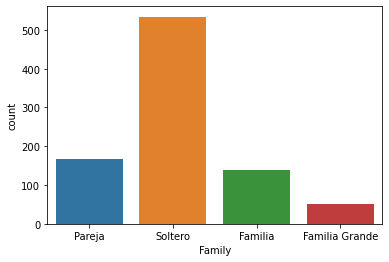

In [22]:
# Veamos la distribución de la nueva columna

sns.countplot(x = df_cat["Family"])

plt.show()

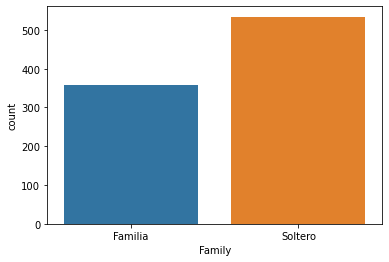

In [23]:
# La categoria de Soltero es muy grande (existe un desbalance), vamos a unir las otras 3 categorias para poder nivelarlo

# Nota: Podemos hacer cualquier cosa que se nos ocurra, esto es una posibilidad de todo lo que podemos hacer.

df_cat["Family"] = df_cat["Family"].replace({"Pareja" : "Familia", "Familia Grande" : "Familia"})

sns.countplot(x = df_cat["Family"]);

### Mr./Mrs.


Vamos a hacer limpieza de esta columna.

In [24]:
df_cat["Mr./Mrs."].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Mr./Mrs., dtype: int64

In [25]:
# Vamos a crear otra categoria a partir del Mr. y Mrs.

dict_mr = df_cat["Mr./Mrs."].value_counts().to_dict()
dict_mr


{'Mr.': 502,
 'Miss.': 179,
 'Mrs.': 121,
 'Master.': 40,
 'Dr.': 7,
 'Rev.': 6,
 'y': 4,
 'Planke,': 3,
 'Impe,': 3,
 'Gordon,': 2,
 'Col.': 2,
 'Mlle.': 2,
 'Major.': 2,
 'Melkebeke,': 1,
 'Jonkheer.': 1,
 'Shawah,': 1,
 'the': 1,
 'Velde,': 1,
 'Capt.': 1,
 'Messemaeker,': 1,
 'Carlo,': 1,
 'Ms.': 1,
 'Mme.': 1,
 'Steen,': 1,
 'Mulder,': 1,
 'Pelsmaeker,': 1,
 'Walle,': 1,
 'der': 1,
 'Billiard,': 1,
 'Don.': 1,
 'Cruyssen,': 1}

In [26]:
# Definimos una función que clasifique según el valor de cada fila.

def func_mr(dict_mr):
    
    for mr, count in dict_mr.items():
        if mr == "Mr.":
            dict_mr[mr] = "Mr."
            
        elif mr == "Mrs.":
            dict_mr[mr] = "Mrs."
            
        elif mr == "Miss.":
            dict_mr[mr] = "Miss."
            
        else:
            dict_mr[mr] = "Other"
            
    return dict_mr
            
dict_mr = func_mr(dict_mr)

dict_mr   


{'Mr.': 'Mr.',
 'Miss.': 'Miss.',
 'Mrs.': 'Mrs.',
 'Master.': 'Other',
 'Dr.': 'Other',
 'Rev.': 'Other',
 'y': 'Other',
 'Planke,': 'Other',
 'Impe,': 'Other',
 'Gordon,': 'Other',
 'Col.': 'Other',
 'Mlle.': 'Other',
 'Major.': 'Other',
 'Melkebeke,': 'Other',
 'Jonkheer.': 'Other',
 'Shawah,': 'Other',
 'the': 'Other',
 'Velde,': 'Other',
 'Capt.': 'Other',
 'Messemaeker,': 'Other',
 'Carlo,': 'Other',
 'Ms.': 'Other',
 'Mme.': 'Other',
 'Steen,': 'Other',
 'Mulder,': 'Other',
 'Pelsmaeker,': 'Other',
 'Walle,': 'Other',
 'der': 'Other',
 'Billiard,': 'Other',
 'Don.': 'Other',
 'Cruyssen,': 'Other'}

In [27]:
df_cat["Title"] = df_cat["Mr./Mrs."].map(dict_mr)

df_cat.drop("Mr./Mrs.", axis = 1, inplace = True)

df_cat.head()

,Name,Sex,Ticket,Surname,Family,Title
0,"Braund, Mr. Owen Harris",male,A/5 21171,Braund,Familia,Mr.
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,Cumings,Soltero,Mrs.
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Heikkinen,Soltero,Miss.
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,Futrelle,Familia,Mrs.
4,"Allen, Mr. William Henry",male,373450,Allen,Familia,Mr.


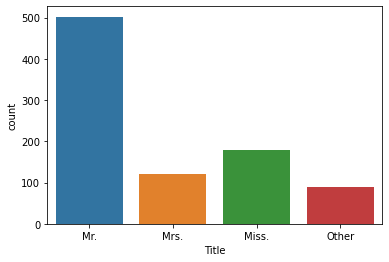

In [28]:
sns.countplot(x = df_cat["Title"])

plt.show()

In [29]:
# Esta vez voy a decidir no unir las categorias, si vemos los datos de la columna "Sex"
# podemos ver que hay mas hombres que mujeres, por lo que si unimos las 3 categorias menores 
# vamos a quedar practicamente con la misma informacion que la columna "Sex"

### Sex, Familia, Title

Ya tenemos la información limpia de estas 3 columnas, ahora debemos transformar estas columnas a numéricas.

Para esto existen 2 funciones:
1. **pd.get_dummies()**: esta función va a generar una columna por cada elemento único en una columna y, dependiendo del valor, va a colocar 1 en la columna correspondiente y 0 en las otras. Esté método resulta de utilidad cuando la categoria no sigue un orden en particular.


2. **sklearn.preprocessing.LabelEncoder()**: esta función transforma toda la columna a números enteros, si la columna tiene n elementos únicos, va a cambiar esos elementos por lo números desde el **`0 hasta n - 1`**. Éste método resulta de utilidad si la categoria sigue cierto orden.

In [30]:
pd.get_dummies(data = df_cat["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [31]:
# Para unir estas nuevas columnas a df_cat podemos hacer un pd.concat()

df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat["Sex"])], axis = 1)

df_cat

,Name,Sex,Ticket,Surname,Family,Title,female,male
0,"Braund, Mr. Owen Harris",male,A/5 21171,Braund,Familia,Mr.,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,Cumings,Soltero,Mrs.,1,0
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Heikkinen,Soltero,Miss.,1,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,Futrelle,Familia,Mrs.,1,0
4,"Allen, Mr. William Henry",male,373450,Allen,Familia,Mr.,0,1
...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Montvila,Soltero,Other,0,1
887,"Graham, Miss. Margaret Edith",female,112053,Graham,Familia,Miss.,1,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Johnston,Familia,Miss.,1,0
889,"Behr, Mr. Karl Howell",male,111369,Behr,Soltero,Mr.,0,1


In [32]:
# Y ahora podemos eliminar la columna "Sex"

df_cat.drop("Sex", axis = 1, inplace = True)

df_cat.head(3)

,Name,Ticket,Surname,Family,Title,female,male
0,"Braund, Mr. Owen Harris",A/5 21171,Braund,Familia,Mr.,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,Cumings,Soltero,Mrs.,1,0
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,Heikkinen,Soltero,Miss.,1,0


In [33]:
# Vamos a repetir la operación con las columnas "Family" y "Title"

for col in ["Family", "Title"]:
    
    df_cat = pd.concat([df_cat, pd.get_dummies(data = df_cat[col])], axis = 1)

    df_cat.drop(col, axis = 1, inplace = True)
    
df_cat

,Name,Ticket,Surname,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other
0,"Braund, Mr. Owen Harris",A/5 21171,Braund,0,1,1,0,0,1,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,Cumings,1,0,0,1,0,0,1,0
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,Heikkinen,1,0,0,1,1,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,Futrelle,1,0,1,0,0,0,1,0
4,"Allen, Mr. William Henry",373450,Allen,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",211536,Montvila,0,1,0,1,0,0,0,1
887,"Graham, Miss. Margaret Edith",112053,Graham,1,0,1,0,1,0,0,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,Johnston,1,0,1,0,1,0,0,0
889,"Behr, Mr. Karl Howell",111369,Behr,0,1,0,1,0,1,0,0


In [34]:
# Ahora voy a hacer drop de las columnas "Name", "Surname" y "Ticket"
# De la columna "Name" sacamos "Surname" y luego "Family", por lo que es información redundate
# Y de la columna "Ticket" podemos sacar información similar a la que sacamos con la columna "Surname"

df_cat.drop(["Name", "Surname", "Ticket"], axis = 1, inplace = True)

df_cat.head()

,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other
0,0,1,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0
2,1,0,0,1,1,0,0,0
3,1,0,1,0,0,0,1,0
4,0,1,1,0,0,1,0,0


# df_num:

In [35]:
df_num.head()

,PassengerId,Age,Survived,Pclass,Fare
0,1.0,22.0,0.0,3.0,7.2500
1,2.0,38.0,1.0,1.0,71.2833
2,3.0,26.0,1.0,3.0,7.9250
3,4.0,35.0,1.0,1.0,53.1000
4,5.0,35.0,0.0,3.0,8.0500


In [36]:
# La columna Pclass es categorica y numerica, por lo que la vamos a dejar tal cual está
# La columna Survived es la columna que queremos predecir
# La columna PassengerId es un indice, tiene todos los valores diferentes, por lo tanto, vamos a hacer .drop() de esta columna

df_num.drop("PassengerId", axis = 1, inplace = True)

df_num

,Age,Survived,Pclass,Fare
0,22.00,0.0,3.0,7.2500
1,38.00,1.0,1.0,71.2833
2,26.00,1.0,3.0,7.9250
3,35.00,1.0,1.0,53.1000
4,35.00,0.0,3.0,8.0500
...,...,...,...,...
886,27.00,0.0,2.0,13.0000
887,19.00,1.0,1.0,30.0000
888,27.25,0.0,3.0,23.4500
889,26.00,1.0,1.0,30.0000


### Binning
Binning es un proceso de transformación de variables numéricas continuas en "contenedores" categóricos discretos, para análisis agrupados.

### Fare

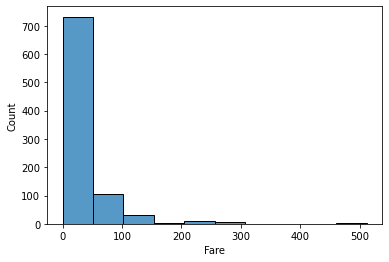

In [37]:
sns.histplot(df_num["Fare"], bins = 10)

plt.show()

In [38]:
# Vamos a aplicar Binning a esta columna, bins = 4

bins = np.linspace(min(df_num["Fare"]), max(df_num["Fare"]), 5)
bins

array([  0.    , 128.0823, 256.1646, 384.2469, 512.3292])

In [39]:
categorias = ["Poco", "Medio", "Alto", "Mucho"]

In [40]:
df_num["Fare-Binning"] = pd.cut(df_num["Fare"], bins, labels = categorias, include_lowest = True)

In [41]:
df_num.head()

,Age,Survived,Pclass,Fare,Fare-Binning
0,22.0,0.0,3.0,7.2500,Poco
1,38.0,1.0,1.0,71.2833,Poco
2,26.0,1.0,3.0,7.9250,Poco
3,35.0,1.0,1.0,53.1000,Poco
4,35.0,0.0,3.0,8.0500,Poco


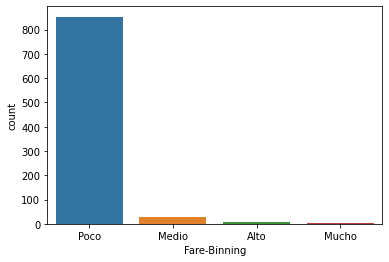

In [42]:
sns.countplot(x = df_num["Fare-Binning"])

plt.show()

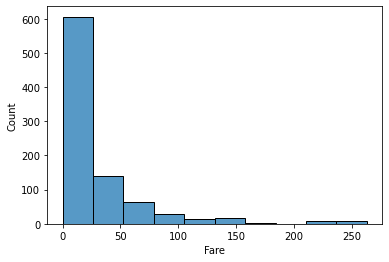

In [43]:
# Vemos que el binning se ve afectado por los outliers de esta columna
# Vamos a eliminarlos

df_num = df_num[df_num["Fare"] < 400]

sns.histplot(df_num["Fare"], bins = 10)

plt.show()

In [45]:
# Aplicamos otra vez Binning

bins = np.linspace(min(df_num["Fare"]), max(df_num["Fare"]), 5)

bins

array([  0.  ,  65.75, 131.5 , 197.25, 263.  ])

In [46]:
categorias = ["Poco", "Medio", "Alto", "Mucho"]

df_num["Fare-Binning"] = pd.cut(df_num["Fare"], bins, labels = categorias, include_lowest = True)

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_1412/1859386809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Fare-Binning"] = pd.cut(df_num["Fare"], bins, labels = categorias, include_lowest = True)


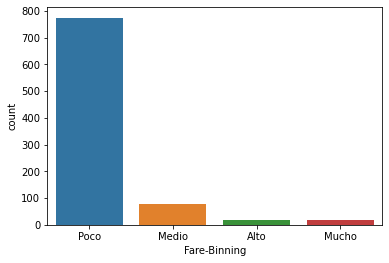

In [47]:
sns.countplot(x = df_num["Fare-Binning"])

plt.show()

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_1412/318034438.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Fare-Binning"] = pd.cut(df_num["Fare"], bins, labels = categorias, include_lowest = True)


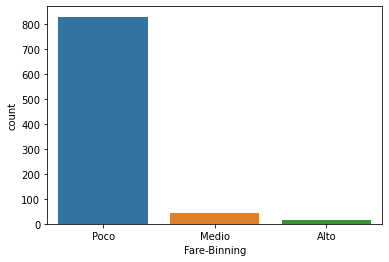

In [48]:
# Existe un desbalance muy grande aún

# Vamos a hacer 3 grupos en lugar de 4


bins = np.linspace(min(df_num["Fare"]), max(df_num["Fare"]), 4)

categorias = ["Poco", "Medio", "Alto"]

df_num["Fare-Binning"] = pd.cut(df_num["Fare"], bins, labels = categorias, include_lowest = True)

sns.countplot(x = df_num["Fare-Binning"])

plt.show()

In [ ]:
# Aun existe un desbalance importante

# Por ahora dejemos esta columna como está y luego veremos si es de importancia

# Age

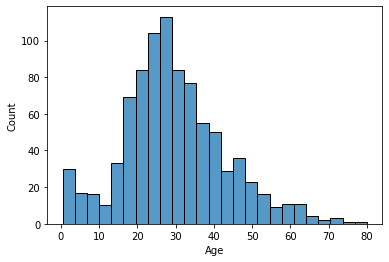

In [49]:
sns.histplot(df_num["Age"])

plt.show()

In [50]:
# Vamos a hacer Binning con bins = 3

bins = np.linspace(min(df_num["Age"]), max(df_num["Age"]), 4)
bins

array([ 0.42      , 26.94666667, 53.47333333, 80.        ])

In [51]:
categorias = ["Joven", "Adulto", "Viejo"]

In [52]:
df_num["Age-Binning"] = pd.cut(df_num["Age"], bins, labels = categorias, include_lowest = True)

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_1412/917167305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Age-Binning"] = pd.cut(df_num["Age"], bins, labels = categorias, include_lowest = True)


In [53]:
df_num.head()

,Age,Survived,Pclass,Fare,Fare-Binning,Age-Binning
0,22.0,0.0,3.0,7.2500,Poco,Joven
1,38.0,1.0,1.0,71.2833,Poco,Adulto
2,26.0,1.0,3.0,7.9250,Poco,Joven
3,35.0,1.0,1.0,53.1000,Poco,Adulto
4,35.0,0.0,3.0,8.0500,Poco,Adulto


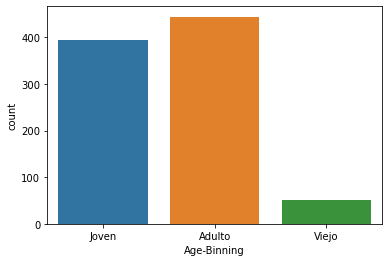

In [54]:
sns.countplot(x = df_num["Age-Binning"])

plt.show()

In [55]:
# Vamos a dejarlo así, y vamos a convertir esta columna a numerica con LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Inicializamos un objeto LabelEncoder()
age_labelEncoding = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
age_labelEncoding.fit(df_num["Age-Binning"].values)

# Transformamos la columna
age = age_labelEncoding.transform(df_num["Age-Binning"].values)

age

# El resultado es la columna cambiada a numeros.

array([1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [56]:
df_num["Age-Binning"] = age

df_num["Age-Binning"].value_counts()

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_1412/563200630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Age-Binning"] = age


0    444
1    394
2     50
Name: Age-Binning, dtype: int64

In [57]:
# Vamos a hacer lo mismo con "Fare-Binning"

# Inicializamos un objeto LabelEncoder()
fare_labelEncoding = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
fare_labelEncoding.fit(df_num["Fare-Binning"].values)

# Transformamos la columna
fare = fare_labelEncoding.transform(df_num["Fare-Binning"].values)

df_num["Fare-Binning"] = fare

df_num["Fare-Binning"].value_counts()

# El resultado es la columna cambiada a numeros.

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_1412/146221795.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Fare-Binning"] = fare


2    828
1     43
0     17
Name: Fare-Binning, dtype: int64

In [58]:
df_num.head()

,Age,Survived,Pclass,Fare,Fare-Binning,Age-Binning
0,22.0,0.0,3.0,7.2500,2,1
1,38.0,1.0,1.0,71.2833,2,0
2,26.0,1.0,3.0,7.9250,2,1
3,35.0,1.0,1.0,53.1000,2,0
4,35.0,0.0,3.0,8.0500,2,0


## Feature Selection

In [59]:
# Vamos a unir df_num y df_cat

df = pd.concat([df_num, df_cat], axis = 1)

df.head()

,Age,Survived,Pclass,Fare,Fare-Binning,Age-Binning,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other
0,22.0,0.0,3.0,7.2500,2.0,1.0,0,1,1,0,0,1,0,0
1,38.0,1.0,1.0,71.2833,2.0,0.0,1,0,0,1,0,0,1,0
2,26.0,1.0,3.0,7.9250,2.0,1.0,1,0,0,1,1,0,0,0
3,35.0,1.0,1.0,53.1000,2.0,0.0,1,0,1,0,0,0,1,0
4,35.0,0.0,3.0,8.0500,2.0,0.0,0,1,1,0,0,1,0,0


In [60]:
# NOTA: Como eliminamos filas de df_num y no eliminamos filas de df_cat, el DataFrame tendrá NaN's

df.isnull().sum()/df.shape[0]

Age             0.003367
Survived        0.003367
Pclass          0.003367
Fare            0.003367
Fare-Binning    0.003367
Age-Binning     0.003367
female          0.000000
male            0.000000
Familia         0.000000
Soltero         0.000000
Miss.           0.000000
Mr.             0.000000
Mrs.            0.000000
Other           0.000000
dtype: float64

In [ ]:
# Podemos hacer una imputación de los datos, pero par este ejemplo vamos a eliminar esas filas

df.dropna(inplace = True)

df.isnull().sum()/df.shape[0]

Age             0.0
Survived        0.0
Pclass          0.0
Fare            0.0
Fare-Binning    0.0
Age-Binning     0.0
female          0.0
male            0.0
Familia         0.0
Soltero         0.0
Miss.           0.0
Mr.             0.0
Mrs.            0.0
Other           0.0
dtype: float64

In [ ]:
# Ahora vamos a separar la columna "objetivo" del resto de columnas
df_class = df["Survived"].copy()

# Como ya tenemos la columna "objetivo" en otra variable vamos a eliminarla del DataFrame original
df.drop("Survived", axis = 1, inplace = True)

In [65]:
# Ya tenemos todos los datos en numericos, vamos a hacer Feature Selection
# Este primer Feature Selection lo hare utilizando la columna "Age-Binning" (excluyendo "Age")

X = np.asarray(df.drop("Age", axis = 1))
y = np.asarray(df_class)

Feature ranking:
1. feature 1 (0.413527): Age
2. feature 4 (0.127515): Pclass
3. feature 0 (0.123567): Fare
4. feature 5 (0.104355): Fare-Binning
5. feature 9 (0.092536): Age-Binning
6. feature 3 (0.041928): female
7. feature 10 (0.024382): male
8. feature 8 (0.021052): Familia
9. feature 11 (0.014241): Soltero
10. feature 2 (0.012925): Miss.
11. feature 6 (0.012470): Mr.
12. feature 7 (0.011501): Mrs.


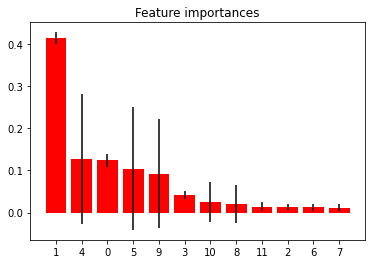

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df.columns[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [67]:
# Ahora otro Feature Selection pero esta vez excluyendo "Age-Binning"

X = np.asarray(df.drop("Age-Binning", axis = 1))
y = np.asarray(df_class)

Feature ranking:
1. feature 2 (0.269915): Age
2. feature 0 (0.264351): Pclass
3. feature 4 (0.108579): Fare
4. feature 1 (0.103995): Fare-Binning
5. feature 5 (0.093315): Age-Binning
6. feature 9 (0.077237): female
7. feature 10 (0.020587): male
8. feature 8 (0.019304): Familia
9. feature 11 (0.011905): Soltero
10. feature 3 (0.010653): Miss.
11. feature 6 (0.010600): Mr.
12. feature 7 (0.009558): Mrs.


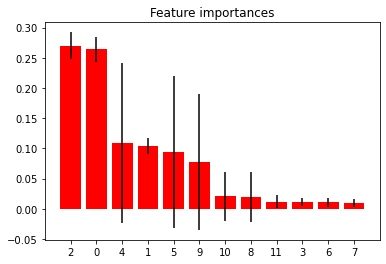

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], df.columns[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()